In [1]:
from google.colab import files
files.upload()

Saving mnist.pkl.gz to mnist.pkl.gz


In [3]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import gzip
import pickle

def load_data(path):               
    f = gzip.open(path, 'rb')
    training_data, test_data = pickle.load(f, encoding = 'latin1')   
    f.close()
    return (training_data, test_data)

(x_train, y_train), (x_test, y_test) = load_data("/content/mnist.pkl.gz") # 파일 경로

In [5]:
def get_one_hot(targets, nb_classes):   # numpy 원 핫 인코딩을 구하는 함수
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])


print("----before reshape----")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

nb_classes = 10                                  # 출력 개수

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])             # 훈련 데이터
y_train = get_one_hot(y_train, nb_classes)          # 훈련 타깃
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])               # 테스트 데이터
y_test = get_one_hot(y_test, nb_classes)           # 테스트 타깃

print("----after reshape----")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

----before reshape----
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
----after reshape----
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
# preprocessing은 도와드릴게요
x_train, x_test = x_train/255, x_test/255

In [7]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis= 1))	# tf.reduce_sum의 axis 값이 의미하는 것은 무엇일까요?
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) # 최종 Accuracy 0.8 이상이 나오도록 learning_rate 찾아주세요
											
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # tf.argmax 2번째 인수 값이 의미하는 것은 무엇일까요?
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
	# numpy 미니 배치 제너레이터
def gen_batch(x, y, batch_size):
    length = len(x)
    bins = length // batch_size # 미니배치 횟수
    if length % batch_size:
        bins += 1                    # 나누어 떨어지지 않을 때
    indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.


# parameters
training_epochs = 15
batch_size = 100

# with tf.Session() as sess:
sess = tf.Session()
# Initialize TensorFlow variables    
sess.run(tf.global_variables_initializer())

# Training cycle
for epoch in range(training_epochs):    
    avg_cost = 0    
    total_batch = len(x_train) // batch_size
    
    for batch_xs, batch_ys in gen_batch(x_train, y_train, batch_size): # 어떤 데이터를 학습에 이용해야 할까요?
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch         
    
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: x_test, Y: y_test}))

Epoch: 0001 cost = 2.434220061
Epoch: 0002 cost = 1.018154094
Epoch: 0003 cost = 0.826652318
Epoch: 0004 cost = 0.727885061
Epoch: 0005 cost = 0.664824697
Epoch: 0006 cost = 0.619087255
Epoch: 0007 cost = 0.584246185
Epoch: 0008 cost = 0.556662413
Epoch: 0009 cost = 0.533846115
Epoch: 0010 cost = 0.514897666
Epoch: 0011 cost = 0.498346301
Epoch: 0012 cost = 0.484029537
Epoch: 0013 cost = 0.470912703
Epoch: 0014 cost = 0.459753476
Epoch: 0015 cost = 0.449469275
Accuracy:  0.892


Label: [2]
Prediction: [2]


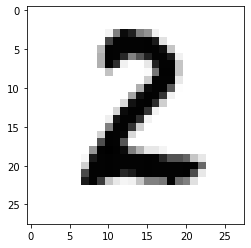

In [10]:
import matplotlib.pyplot as plt
import random

# Get one and predict
r = random.randint(0, len(x_test) - 1)
# print(mnist.test.num_examples)
print("Label:", sess.run(tf.argmax(y_test[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), 
                      feed_dict={X: x_test[r:r + 1]}))

plt.imshow(x_test[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()